# Lab 3: Decision Trees


In [4]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Installing the Graphviz module used for visualizing the decision tree
!pip install graphviz
!conda install graphviz --y
!conda install python-graphviz --y

     |████████████████████████████████| 46 kB 1.8 MB/s eta 0:00:011
Solving environment: \ ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt

^C

CondaError: KeyboardInterrupt



## Question 1
Read the weather dataset, using read_csv. How many rows and columns are there?

In [7]:
weather_df = pd.read_csv('weather.nominal.csv')

In [10]:
weather_df.shape

(14, 5)

### Features and Target: X and y
We construct a dataframe, labeled X, consisting of all the columns except the target, 'play'. They we construct a series, y, consisting solely of the target column 'play'.

In [12]:
X = weather_df[['outlook', 'temperature', 'humidity', 'windy']]
y = weather_df['play']

### Dummy Values
The features in X can have multiple nominal values -- for example, 'temperature' can be 'hot', 'mild' or 'cool'. We convert the features into multiple binary-valued features, using get_dummies. 

In [13]:
X = pd.get_dummies(X)

## Question 2
How many rows and columns are there in X after applying get_dummies?

In [14]:
X.shape

(14, 9)

In [28]:
X.head(len(X))

,windy,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal
0,False,0,0,1,0,1,0,1,0
1,True,0,0,1,0,1,0,1,0
2,False,1,0,0,0,1,0,1,0
3,False,0,1,0,0,0,1,1,0
4,False,0,1,0,1,0,0,0,1
5,True,0,1,0,1,0,0,0,1
6,True,1,0,0,1,0,0,0,1
7,False,0,0,1,0,0,1,1,0
8,False,0,0,1,1,0,0,0,1
9,False,0,1,0,0,0,1,0,1


## Making a decision tree
We create a decision tree for the weather data, called dtree. We simply assign dtree to <b>DecisionTreeClassifier()</b>, which creates a decision tree instance. To train the model, use the <b>fit</b> method. Then you print accuracy.

In [16]:
dtree = DecisionTreeClassifier()
dtree.fit(X, y)
print("Accuracy on training set: {:.3f}".format(dtree.score(X, y)))


Accuracy on training set: 1.000


Next, you can display the tree using graphviz

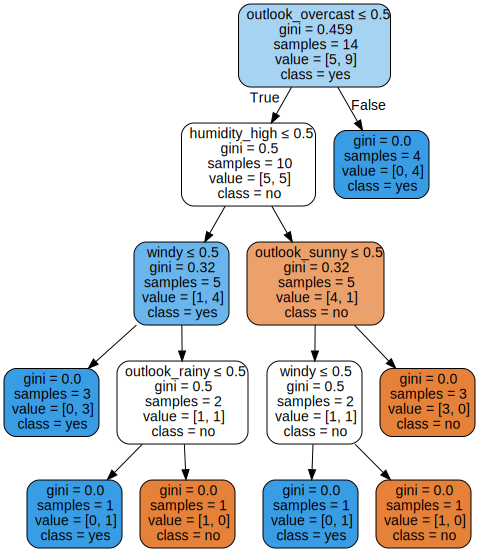

In [26]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
    dtree,
    out_file=None,
    feature_names=X.columns,
    class_names=['no','yes'],
    filled=True, 
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph

## Question 3
Create a new version of the tree, where the maximum depth is 2. You need to call <b>DecisionTreeClassifier</b> again and set the <b>max_depth</b> parameter. Display the resulting tree with graphviz. What is the accuracy now? What features are used?


In [47]:
dtree2 = DecisionTreeClassifier(max_depth=2, criterion='entropy')
dtree2.fit(X,y)
print("Accuracy on training set: {:.3f}".format(dtree2.score(X, y)))


Accuracy on training set: 0.857


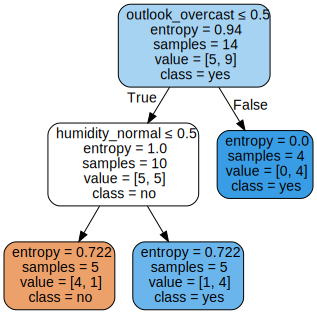

In [48]:
#Outlook_overcast, humidity high 
dot_data = export_graphviz(
    dtree2,
    out_file=None,
    feature_names=X.columns,
    class_names=['no','yes'],
    filled=True, 
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph

## Question 4

Each path in a decision tree can be treated as a rule, of the form, <b>If A and B ... Then class=V</b>. Give the shortest path of the above tree, in a rule of this form.


If Not outlook_overcast is False Then class=yes

or more simply

If overcast then play

## Question 5
Read the mushroom dataset, using read_csv. How many rows and columns are there?

In [70]:
mushroom_df = pd.read_csv('mushroom.csv')
mushroom_df.shape

print("rows:",mushroom_df.shape[0])
print("Col:",mushroom_df.shape[1])

rows: 8416
Col: 23


## Question 6
Create a dataframe X will all columns except the target, 'class'. You can either list all the columns, like you did for weather, or use the method
<a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html>drop</a>.
(Make sure to set axis=1, which specifies that is it a column not a row.) 

Next create a series, y, consisting of the single column, 'class'.

In [89]:
X = mushroom_df.drop(['class'], axis=1)
y = mushroom_df['class']

In [90]:
X.head(2)

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS


In [91]:
y.head(2)

0    EDIBLE
1    EDIBLE
Name: class, dtype: object

## Question 7
Now convert X into binary values, using get_dummies, like we did with weather.

In [92]:
X = pd.get_dummies(X)

In [93]:
y.shape

(8416,)

## Question 8
Create a decision tree for the mushroom data, using default values for the tree. Fit the tree to the X and y data, and print accuracy on the training data. Display the tree using graphviz.

In [101]:
dtree = DecisionTreeClassifier()
dtree.fit(X, y)
print("Accuracy on training set: {:.3f}".format(dtree.score(X, y)))

Accuracy on training set: 1.000


In [112]:
types = y.unique()
print(types)

['ja til rape', 'nej til rape']


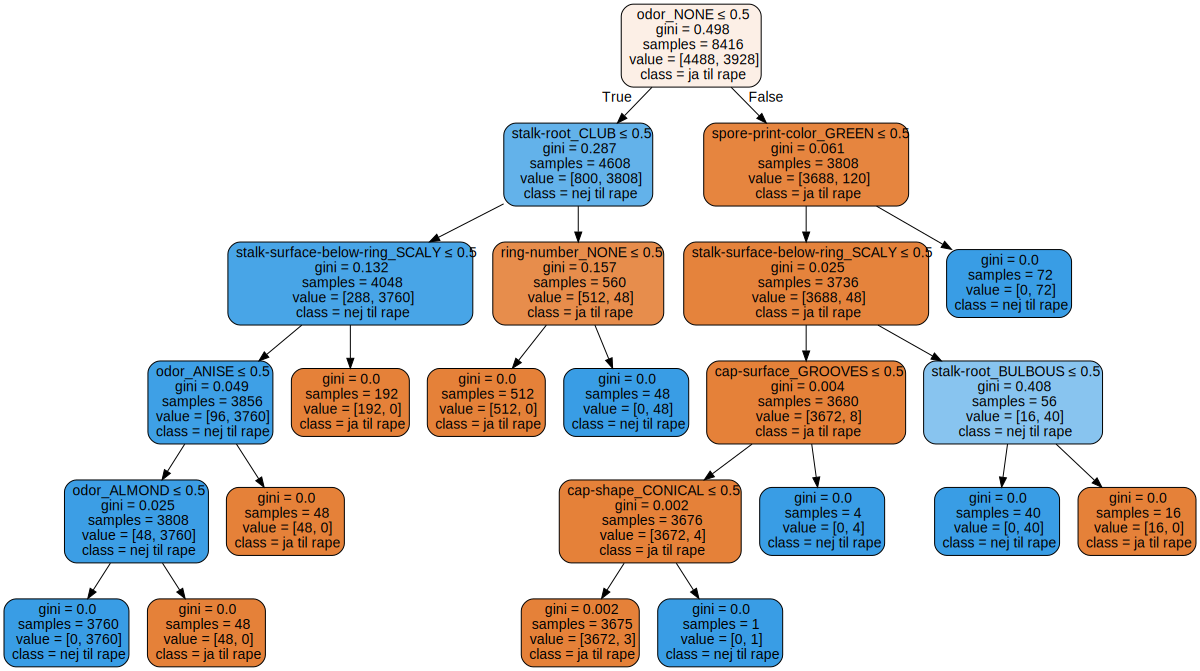

In [113]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
    dtree,
    out_file=None,
    feature_names=X.columns,
    class_names=types,
    filled=True, 
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph

## Question 9
Create a decision tree with max_depth=2. Fit the tree and print accuracy. Display the tree.

Accuracy on training set: 0.954


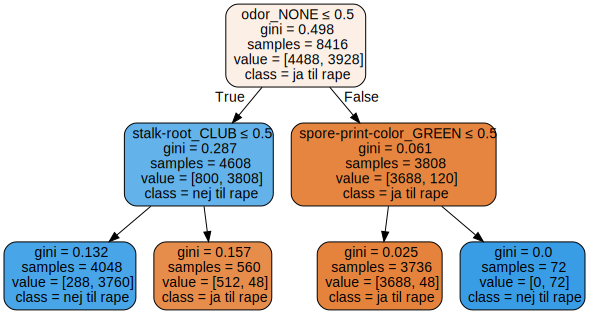

In [114]:
dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(X, y)
print("Accuracy on training set: {:.3f}".format(dtree.score(X, y)))
dot_data = export_graphviz(
    dtree,
    out_file=None,
    feature_names=X.columns,
    class_names=types,
    filled=True, 
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph

## Question 10
A standard baseline for a binary classifier, is simply to guess the most frequent class. What is the most frequent class for the mushroom data? What is the accuracy of a baseline classifier that always guesses the most frequent class?

In [122]:
y.value_counts()

EDIBLE       4488
POISONOUS    3928
Name: class, dtype: int64

In [121]:
y.value_counts()[:1]

EDIBLE    4488
Name: class, dtype: int64

Most frequent and what is the accuraccy

In [133]:
edidable = y.value_counts()[0]
poison = y.value_counts()[1]
acc = edidable/(edidable + poison)

print(acc)

0.5332699619771863
